In [33]:
%pip install phenoAI-0.1-py3-none-any.whl

Defaulting to user installation because normal site-packages is not writeable
Processing ./phenoAI-0.1-py3-none-any.whl
phenoAI is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


In [34]:
%pip install --upgrade tensorflow
%pip install --upgrade keras
%pip install --upgrade efficientnet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached efficientnet-1.1.1-py3-none-any.whl.metadata (6.4 kB)
Using cached efficientnet-1.1.1-py3-none-any.whl (18 kB)
  Attempting uninstall: efficientnet
    Found existing installation: efficientnet 1.0.0
    Uninstalling efficientnet-1.0.0:
      Successfully uninstalled efficientnet-1.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
segmentation-models 1.0.1 requires efficientnet==1.0.0, but you have efficientnet 1.1.1 which is incompatible.
Note: you may need to restart the kernel to us

In [35]:
import phenoAI

Segmentation Models: using `keras` framework.
Documentation:
This Package contains three module-

1. formatFilesName(dataset_path,date_format,start_index): To rename images file names that help in extracting Date from file name. File formating is mandatory before analysis.
Here, dataset_path: location of image data and labels,
date_format: format of the date which is written in all files name.It should contains 'yyyy', 'dd' and 'mm'. For examples: 'yyyy-mm-dd' for (2019-05-11), 'mmddyyyy' for(04221999) etc.
index: It is the index in filenames from where date_format starts/ends. It must be same for all files. Consider name of the file without its extesion. Date index must be >= 1 (from left to right) or <= -1 (from right to left). 
For example suppose file names are like-  'Screenshot_20221204-15:22:59-586_com.google.jpg', here, date_formate is 'yyyymmdd'(20221204) and index is 12(12th position from start in the file name). For 'assgrhekjnigen_04-11-2021_WA.png', date_format is 'mm-dd-y

In [20]:

#print(dir(phenoAI)) #Removed the extra indent before print

In [21]:
# import phenoAI

# # List of functions you're interested in
# functions_to_check = ['Build_Pheno_AI', 'Get_Pheno_Model', 'buildPhenoAI', 'formatFilesName', 'getPhenoModel', 'set_date_formate']

# # Loop through the functions and print their help information
# for function_name in functions_to_check:
#     try:
#         print(f"Help for {function_name}:")
#         help(getattr(phenoAI, function_name))  # Get the function object using getattr
#         print("-" * 20)  # Separator for better readability
#     except AttributeError:
#         print(f"Function '{function_name}' not found in phenoAI module.")
#         print("-" * 20)

In [36]:
Dataset_path= "/Users/ishan/Downloads/DAI_Project/labelled"

In [23]:
# pheno_model =phenoAI.buildPhenoAI(Dataset_path, epochs = 35,learning_rate = 0.001, batch_size = 16,is_augmentation = True)

In [24]:
# pheno_model = phenoAI.buildPhenoAI(Dataset_path)  # Adjust as necessary if Dataset_path isn't required in the constructor

# # Call a training or configuration method if available
# pheno_model.train(epochs=35, learning_rate=0.001, batch_size=16, is_augmentation=True)  # Hypothetical method


In [37]:
%pip install tensorflow opencv-python-headless albumentations


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
import os
import glob
import json
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import albumentations as A


Found JSON files: ['/Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_110201.json', '/Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_100201.json', '/Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_113201.json', '/Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_103201.json', '/Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_120201.json', '/Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_130201.json', '/Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_123201.json', '/Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_133201.json']
Processing dictionary data from /Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_110201.json
Added label: deciduous from /Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_110201.json
Added label: coniferous from /Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_110201.json
Processing dictionary data from /Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05

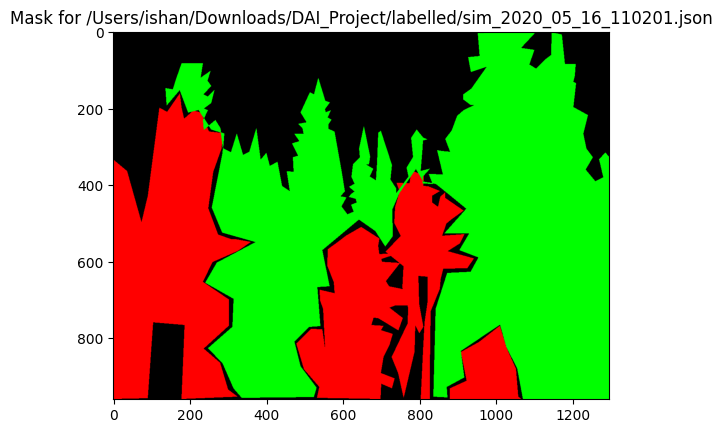

Mask created for /Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_100201.json


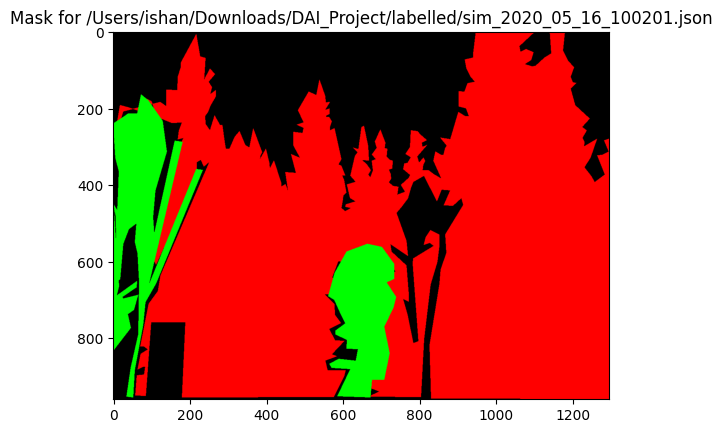

Mask created for /Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_113201.json


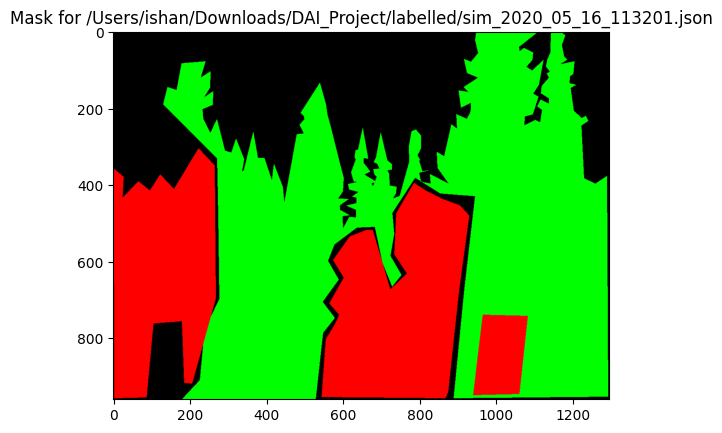

Mask created for /Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_103201.json


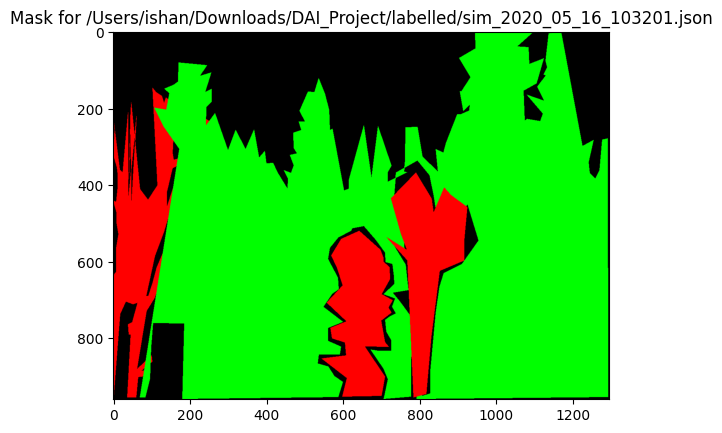

Mask created for /Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_120201.json


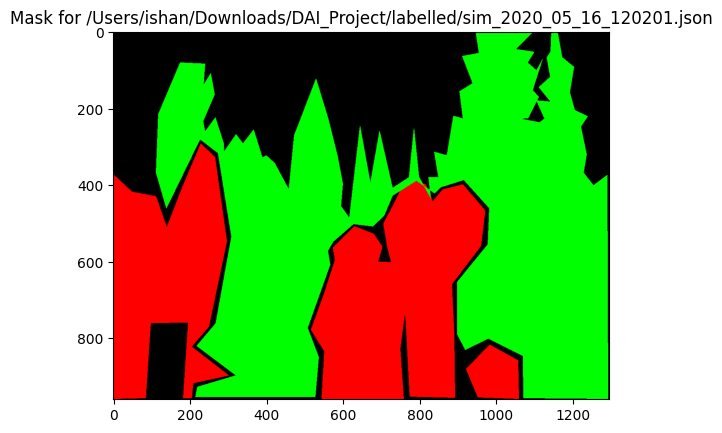

Mask created for /Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_130201.json


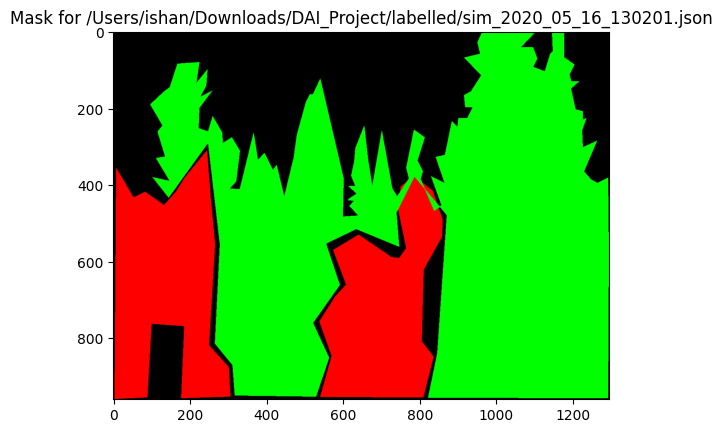

Mask created for /Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_123201.json


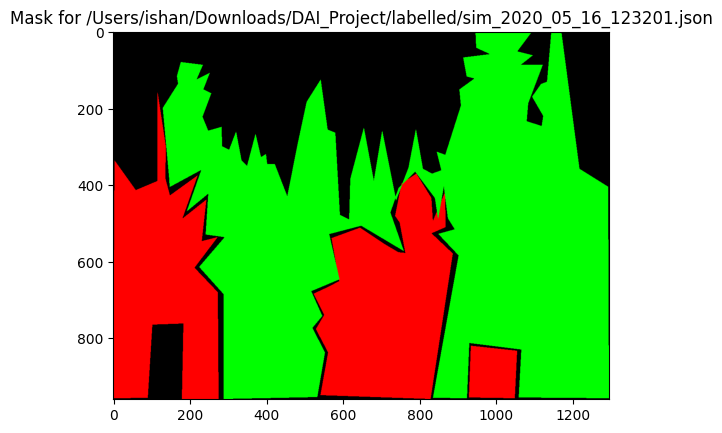

Mask created for /Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_133201.json


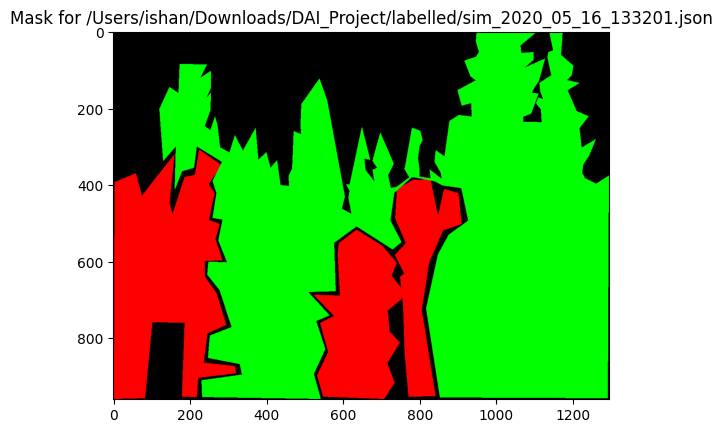

In [39]:
import os
import glob
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to load classes from JSON annotations
def load_classes(dataset_path):
    classes = set()
    for dirpath, dirnames, filenames in os.walk(dataset_path):
        json_files = glob.glob(os.path.join(dirpath, "*.json"))

        # Only print the JSON files if there are any
        if json_files:
            print(f"Found JSON files: {json_files}")

        for json_file in json_files:
            with open(json_file) as f:
                try:
                    data = json.load(f)
                except json.JSONDecodeError:
                    print(f"Error: Couldn't decode JSON in {json_file}")
                    continue

                # If the root is a dictionary, process it
                if isinstance(data, dict):
                    print(f"Processing dictionary data from {json_file}")
                    if 'shapes' in data:
                        for shape in data['shapes']:
                            if 'label' in shape:
                                label = shape['label']
                                if label not in classes:  # Print only if the label is new
                                    print(f"Added label: {label} from {json_file}")
                                classes.add(label)
                            else:
                                print(f"Warning: 'label' key missing in one of the shapes in {json_file}")
                    else:
                        print(f"Warning: 'shapes' key missing in {json_file}")

                # If the root is a list, process as before
                elif isinstance(data, list):
                    print(f"Processing list data from {json_file}")
                    for item in data:
                        if isinstance(item, dict) and 'shapes' in item:
                            for shape in item['shapes']:
                                if 'label' in shape:
                                    label = shape['label']
                                    if label not in classes:  # Print only if the label is new
                                        print(f"Added label: {label} from {json_file}")
                                    classes.add(label)
                                else:
                                    print(f"Warning: 'label' key missing in one of the shapes in {json_file}")
                        else:
                            print(f"Warning: 'shapes' key missing or item is not a dict in {json_file}")
                else:
                    print(f"Warning: Data in {json_file} is neither a list nor a dictionary")

    return list(classes)


# Function to convert JSON annotations into a colored mask
def convert_annotation_json_to_mask(path_to_annotation_json, class_colors):
    """
    Converts JSON annotations to a colored mask for two classes.

    Parameters:
    - path_to_annotation_json (str): Path to the annotation JSON file.
    - class_colors (dict): A dictionary mapping class labels to color values.

    Returns:
    - np.array: A mask image with each class colored distinctly.
    """
    with open(path_to_annotation_json) as f:
        data = json.load(f)

        if isinstance(data, dict) and 'shapes' in data and 'imageHeight' in data and 'imageWidth' in data:
            h = data['imageHeight']
            w = data['imageWidth']
            mask = np.zeros((h, w, 3), dtype=np.uint8)

            for annot in data['shapes']:
                if 'label' in annot and 'points' in annot:
                    label = annot['label']
                    points = np.array(annot['points'], dtype=np.int32)

                    if label in class_colors:
                        color = class_colors[label]
                        # Fill the polygon corresponding to the shape with the label's color
                        cv2.fillPoly(mask, [points], color=color)
            return mask
        else:
            print(f"Warning: Invalid data structure in {path_to_annotation_json}")
            return None


# Define colors for the two classes (RGB values)
class_colors = {
    "deciduous": (255, 0, 0),  # Red for Deciduous trees
    "coniferous": (0, 255, 0)  # Green for Coniferous trees
}

# Define the dataset path
dataset_path = Dataset_path # Replace with your actual dataset path

# Load classes and generate masks
classes = load_classes(dataset_path)
print(f"Classes found: {classes}")

# Process each JSON file and create the mask
for annotation_file in glob.glob(os.path.join(dataset_path, "*.json")):
    mask = convert_annotation_json_to_mask(annotation_file, class_colors)

    if mask is not None:
        print(f"Mask created for {annotation_file}")
        plt.imshow(mask)
        plt.title(f"Mask for {annotation_file}")
        plt.show()
    else:
        print(f"No valid mask generated for {annotation_file}")

In [40]:
import os
import glob
import cv2

class Dataset:
    def __init__(self, dataset_path=None, images_fps=None, mask_fps=None, augmentation=None):
        self.images_fps = images_fps or []
        self.mask_fps = mask_fps or []
        self.augmentation = augmentation
        self.classes = load_classes(dataset_path) if dataset_path else []

        # If images_fps and mask_fps are not provided, load them from the dataset path
        if dataset_path and not (images_fps and mask_fps):
            for dirpath, dirnames, filenames in os.walk(dataset_path):
                print(f"Checking directory: {dirpath}")  # Debugging line

                img_src = glob.glob(os.path.join(dirpath, '*.JPEG')) + glob.glob(os.path.join(dirpath, '*.JPG'))
                json_files = glob.glob(os.path.join(dirpath, '*.json'))

                for img_file in img_src:
                    img_base = os.path.splitext(os.path.basename(img_file))[0]  # Base name of the image file
                    self.images_fps.append(img_file)

                    # Find the corresponding JSON file for each image
                    for json_file in json_files:
                        json_base = os.path.splitext(os.path.basename(json_file))[0]  # Base name of the JSON file
                        if json_base == img_base:
                            # Attempt to create the mask
                            try:
                                Mask = convert_annotation_json_to_mask(json_file, class_colors)
                                mask_file = img_file.replace('.JPEG', '_mask.png').replace('.JPG', '_mask.png')
                                cv2.imwrite(mask_file, Mask)

                                # Append only if mask creation is successful
                                if os.path.exists(mask_file):
                                    self.mask_fps.append(mask_file)
                                    print(f"Created mask for {img_file} from {json_file}")
                                else:
                                    print(f"Error: Mask file {mask_file} was not created.")
                            except Exception as e:
                                print(f"Failed to create mask for {img_file} from {json_file}. Error: {e}")
                            break  # Stop after finding the matching JSON file

            print(f"Total images loaded: {len(self.images_fps)}")  # Debugging line
            print(f"Total masks loaded: {len(self.mask_fps)}")  # Debugging line

        # Ensure images and masks match in count
        assert len(self.images_fps) == len(self.mask_fps), "Mismatch between images and masks."

    def __getitem__(self, index):
        image = cv2.imread(self.images_fps[index])
        image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0

        mask = cv2.imread(self.mask_fps[index], cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT))
        mask = mask / 255.0  # Normalize mask to [0, 1]

        if self.augmentation:
            augmented = self.augmentation(image=image, mask=mask)
            image, mask = augmented['image'], augmented['mask']

        return image, mask

    def __len__(self):
        return len(self.images_fps)


In [41]:
def get_augmentation():
    return A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
    ])


In [42]:
import tensorflow as tf
from tensorflow.keras import layers, models

IMG_HEIGHT = 256
IMG_WIDTH = 256
BATCH_SIZE = 32
EPOCHS = 25

def create_model(num_classes):
    base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    base_model.trainable = True

    inputs = layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    x = base_model(inputs, training=True)

    # Upsample to original image size using Conv2DTranspose
    x = layers.Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)  # 8x8 -> 16x16
    x = layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)  # 16x16 -> 32x32
    x = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)  # 32x32 -> 64x64
    x = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)    # 64x64 -> 128x128
    x = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)    # 128x128 -> 256x256

    # Final output layer
    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(x)  # Output shape (256, 256, num_classes)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# if __name__ == "__main__":
    # Main script
augmentation = get_augmentation()
dataset = Dataset(dataset_path="/Users/ishan/Downloads/DAI_Project/labelled", augmentation=augmentation)
print(f"Number of images: {len(dataset.images_fps)}")
print(f"Number of masks: {len(dataset.mask_fps)}")


# Verify there are enough samples to split
if len(dataset.images_fps) > 0 and len(dataset.mask_fps) > 0:
    # Split dataset into training and validation sets
    train_images, val_images, train_masks, val_masks = train_test_split(
        dataset.images_fps, dataset.mask_fps, test_size=0.2, random_state=42
    )

    # Initialize train and validation datasets with split data
    train_dataset = Dataset(images_fps=train_images, mask_fps=train_masks, augmentation=augmentation)
    val_dataset = Dataset(images_fps=val_images, mask_fps=val_masks)
else:
    raise ValueError("The dataset is empty. Ensure that images and masks are loaded correctly.")


# train_dataset = Dataset(Dataset_path, augmentation)
# val_dataset = Dataset(Dataset_path)



# Create TensorFlow Datasets
def dataset_generator(dataset):
    for i in range(len(dataset)):
        image, mask = dataset[i]
        yield image, mask  # mask should be of shape (IMG_HEIGHT, IMG_WIDTH)

train_tf_dataset = tf.data.Dataset.from_generator(
    lambda: dataset_generator(train_dataset),
    output_signature=(
        tf.TensorSpec(shape=(IMG_HEIGHT, IMG_WIDTH, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(IMG_HEIGHT, IMG_WIDTH), dtype=tf.int32)  # Class indices
    )
)

val_tf_dataset = tf.data.Dataset.from_generator(
    lambda: dataset_generator(val_dataset),
    output_signature=(
        tf.TensorSpec(shape=(IMG_HEIGHT, IMG_WIDTH, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(IMG_HEIGHT, IMG_WIDTH), dtype=tf.int32)  # Class indices
    )
)

# Create and train the model
model = create_model(len(dataset.classes))

# Use TensorFlow Datasets for training
model.fit(train_tf_dataset.batch(BATCH_SIZE),
          validation_data=val_tf_dataset.batch(BATCH_SIZE),
          epochs=EPOCHS)

# Save the model
model.save('efficientnet_model.h5')
print("Model saved as 'efficientnet_model.h5'")


Found JSON files: ['/Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_110201.json', '/Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_100201.json', '/Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_113201.json', '/Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_103201.json', '/Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_120201.json', '/Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_130201.json', '/Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_123201.json', '/Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_133201.json']
Processing dictionary data from /Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_110201.json
Added label: deciduous from /Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_110201.json
Added label: coniferous from /Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05_16_110201.json
Processing dictionary data from /Users/ishan/Downloads/DAI_Project/labelled/sim_2020_05

2024-12-12 11:12:44.699520: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.7521 - loss: 0.6891 - val_accuracy: 1.0000 - val_loss: 0.6769
Epoch 2/25


2024-12-12 11:12:45.680303: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step - accuracy: 0.9990 - loss: 0.6387 - val_accuracy: 1.0000 - val_loss: 0.6598
Epoch 3/25


2024-12-12 11:12:46.557048: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step - accuracy: 1.0000 - loss: 0.4848 - val_accuracy: 1.0000 - val_loss: 0.6383
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step - accuracy: 1.0000 - loss: 0.2769 - val_accuracy: 1.0000 - val_loss: 0.5760
Epoch 5/25


2024-12-12 11:12:48.116589: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step - accuracy: 1.0000 - loss: 0.1414 - val_accuracy: 1.0000 - val_loss: 0.4176
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step - accuracy: 1.0000 - loss: 0.0593 - val_accuracy: 1.0000 - val_loss: 0.1995
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step - accuracy: 1.0000 - loss: 0.0251 - val_accuracy: 1.0000 - val_loss: 0.0734
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 0.0269
Epoch 9/25


2024-12-12 11:12:51.398766: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 10/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 11/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step - accuracy: 1.0000 - loss: 5.3021e-04 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 12/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step - accuracy: 1.0000 - loss: 1.8342e-04 - val_accuracy: 1.0000 - val_loss: 7.1569e-04
Epoch 13/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step - accuracy: 1.0000 - loss: 1.0927e-04 - val_accuracy: 1.0000 - val_loss: 3.0292e-04
Epoch 14/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step - accuracy: 1.0000 - loss: 9.9480e-05 - val_accuracy: 1.0000 - val_loss: 1.2497e-04
Epoch 15/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step - accuracy: 1.0000 - loss: 1.9666e-05 - val_accuracy: 1.0000 - val_loss: 5.4924e-05
Epoch 16/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step - accuracy: 1.0000 - loss: 2.9277e-0

2024-12-12 11:12:57.645089: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step - accuracy: 1.0000 - loss: 1.9403e-05 - val_accuracy: 1.0000 - val_loss: 1.1072e-05
Epoch 18/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step - accuracy: 1.0000 - loss: 1.2158e-05 - val_accuracy: 1.0000 - val_loss: 4.8865e-06
Epoch 19/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step - accuracy: 1.0000 - loss: 3.6316e-06 - val_accuracy: 1.0000 - val_loss: 2.9753e-06
Epoch 20/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step - accuracy: 1.0000 - loss: 4.2324e-06 - val_accuracy: 1.0000 - val_loss: 1.5731e-06
Epoch 21/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step - accuracy: 1.0000 - loss: 2.2373e-06 - val_accuracy: 1.0000 - val_loss: 6.5919e-07
Epoch 22/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step - accuracy: 1.0000 - loss: 3.5997e-06 - val_accuracy: 1.0000 - val_loss: 3.1225e-07
Epoch 23/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step - accuracy: 1.0000 - loss: 1.6108e-07 - val_accuracy: 1.0000 - val_loss: 1.7003e-07
Epoch 24/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step - accuracy: 1.00

Model saved as 'efficientnet_model.h5'


In [14]:
import matplotlib.pyplot as plt
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

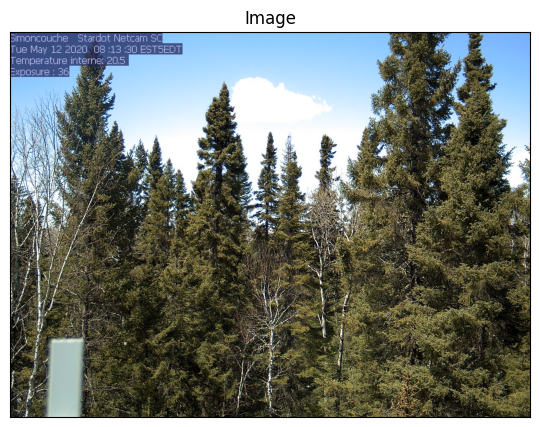

In [15]:
import cv2
import numpy as np

image = cv2.imread(r"/Users/ishan/Downloads/DAI_Project/drive-download-20231010T115422Z-001/SIM2020/05/sim_2020_05_16_120201.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image = image)
H,W,_=image.shape

img = cv2.resize(image, (256,256))
img = np.expand_dims(img, axis=0)


In [2]:
from keras.models import load_model


/Users/ishan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [24]:
from tensorflow.keras.utils import register_keras_serializable
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
import os
from tensorflow.keras.models import load_model

# Define and register the FixedDropout layer
@register_keras_serializable()
class FixedDropout(Layer):
    def __init__(self, rate, seed=None, noise_shape=None, **kwargs):
        super(FixedDropout, self).__init__(**kwargs)
        self.rate = rate
        self.seed = seed
        self.noise_shape = noise_shape

    def build(self, input_shape):
        super(FixedDropout, self).build(input_shape)

    def call(self, inputs, training=None):
        if training:
            return K.dropout(inputs, self.rate, seed=self.seed, noise_shape=self.noise_shape)
        return inputs

# Register custom activation function
@register_keras_serializable()
def swish(x):
    return x * K.sigmoid(x)

# Load model with the registered swish and FixedDropout
model_path = '/Users/ishan/Downloads/my_model.h5'
if os.path.exists(model_path):
    model = load_model(model_path, custom_objects={'swish': swish, 'FixedDropout': FixedDropout})
    print("Model loaded successfully!")
else:
    print(f"Model file not found at {model_path}")

Model loaded successfully!


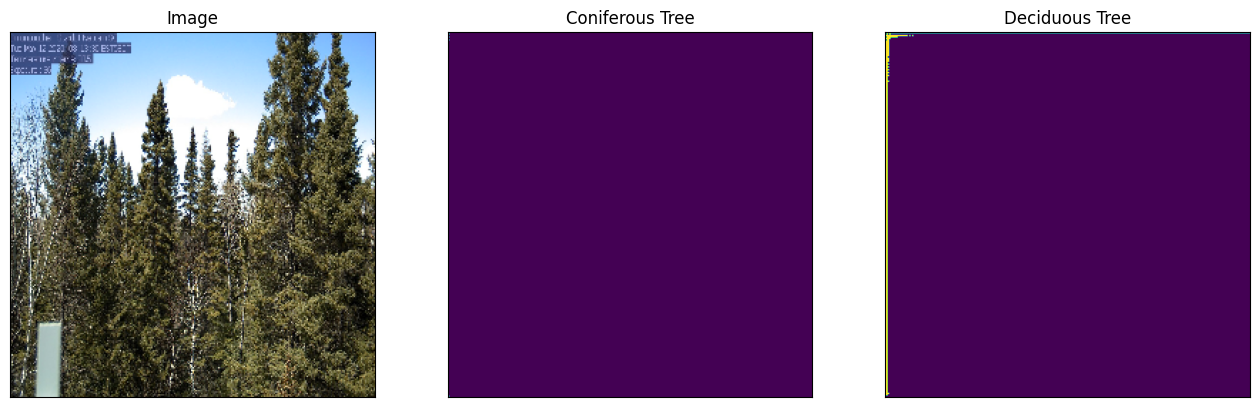

In [25]:
mask = model.predict(img,verbose=0)>0.5
visualize(
    image=img.squeeze(),
    Coniferous_tree=mask[..., 1].squeeze(),
    deciduous_tree = mask[..., 0].squeeze(),
)

In [26]:
mask = mask[..., 1].squeeze()

In [27]:
points=[]
for i in range(255):
    for j in range(255):
        if(mask[i,j]>0.9):
            points.append([i,j])
points=np.array(points)

scale_h=H/255
scale_w=W/255
thresold_area=20000*(H*W/1200000)
ROI_area=int(thresold_area/(scale_h*scale_w))
n_ROIs = points.shape[0]//ROI_area
print("Total no. of ROIs:",n_ROIs)

Total no. of ROIs: 0


In [28]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=1,max_iter=300)
k_means.fit(points)
centroids = k_means.cluster_centers_
labels= k_means.labels_

/Users/ishan/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
clustering_image=np.zeros((256,256))
for i in range(n_ROIs):
    p=points[labels==i]
    clustering_image[p[:,0],p[:,1]]=255*(i+1)//(n_ROIs)

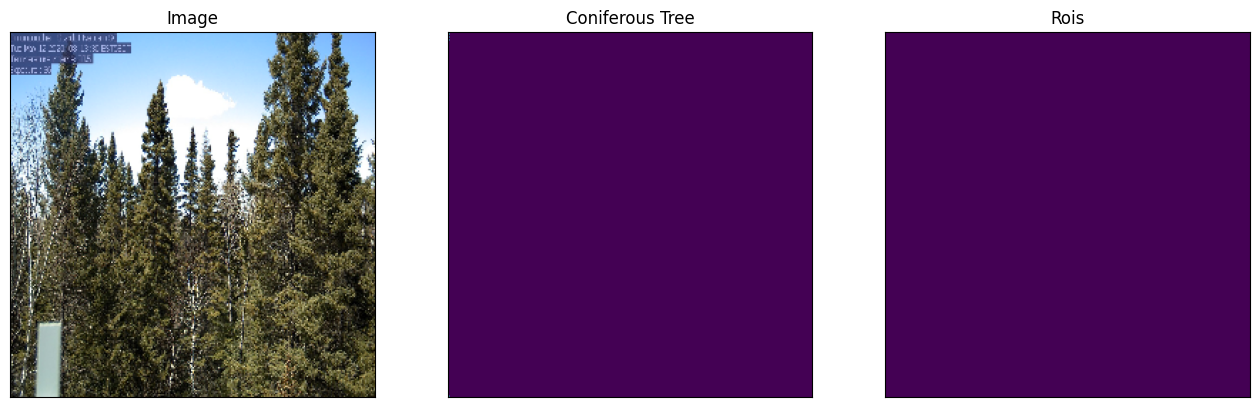

In [30]:
visualize(
    image=img.squeeze(),
    Coniferous_tree=mask,
    ROIs = clustering_image
)

In [31]:
ROIs = []
for i in range(len(labels)):

    if(len(points[labels==i])<ROI_area*0.7):
        continue
    x1=min(points[labels==i][:,1])
    y1=min(points[labels==i][:,0])
    x2=max(points[labels==i][:,1])
    y2=max(points[labels==i][:,0])

    ROI_IMG = np.zeros((y2-y1+1,x2-x1+1))
    ROI_IMG[points[labels==i][:,0]-y1,points[labels==i][:,1]-x1] = 1

    h,w=ROI_IMG.shape
    h,w=int(scale_h*h),int(scale_w*w)
    ROI_image=cv2.resize(ROI_IMG,(w, h))
    ROI=[]
    for i in range(h):
        for j in range(w):
            if(ROI_image[i,j]>0.5):
                ROI.append([i,j])
    ROI=np.array(ROI)
    ROI[:,0]+=int(y1*scale_h)
    ROI[:,1]+=int(x1*scale_w)

    ROIs.append(ROI)

In [32]:
import random
rois=random.sample(ROIs, 4)
ROI_image = image.copy()
for r in rois:
    ROI_image[(r[:,0]),(r[:,1]),1] +=100
    ROI_image[(r[:,0]),(r[:,1]),0] =0
    ROI_image[(r[:,0]),(r[:,1]),2] =0
visualize(
    image_with_ROIs = ROI_image,
)

ValueError: Sample larger than population or is negative